## 신경망 구성
- layer : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- module : 한 개 이상의 layer가 모여서 구성
- model : 한 개 이상의 module이 모여서 구성

### `torch.nn` 패키지
주로 가중치(weights), 편향(bias) 값들이 내부에서 자동으로 생성되는 layer들을 사용할 때 사용 (`weight` 값들을 직접 선언 하지 않음)

https://pytorch.org/docs/stable/nn.html

In [2]:
import torch.nn as nn
import torch

`nn.Linear` layer 예제

In [4]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
print(m)

out = m(input)
print(out)
print(out.size())

tensor([[-0.9006, -0.5134, -0.6396,  ...,  0.0506,  1.3963, -0.3704],
        [ 1.3741, -1.3086,  0.4950,  ..., -1.5139,  0.5192,  0.5936],
        [-0.1405, -0.1582,  0.2129,  ...,  0.0683, -1.8751,  2.2385],
        ...,
        [-1.6374, -0.6339,  0.2885,  ..., -0.4249, -0.7459, -2.1569],
        [-1.4834, -0.5443, -0.6429,  ...,  1.3476, -0.2842,  0.4507],
        [ 1.2627, -0.2767,  0.5076,  ..., -1.0792,  1.1421,  0.8557]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 1.0908, -0.0987,  0.3420,  ..., -0.7168, -0.6279, -0.5765],
        [ 0.0610, -0.0361, -0.4829,  ..., -0.0142, -0.1155,  0.5484],
        [ 0.3808,  0.4366, -0.4899,  ...,  0.2804, -0.1139,  0.6260],
        ...,
        [-0.6691,  1.0144,  1.2391,  ...,  0.3067,  0.1373, -0.7923],
        [-0.2384,  0.1800, -0.1642,  ...,  0.8625, -0.2767, -0.5584],
        [ 0.0485, -0.0436,  0.3491,  ..., -0.6978,  0.5221,  0.0653]],
       grad_fn=<AddmmBackward>)
torch.Size([128, 30])


`nn.Conv2d` layer 예제

In [5]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [6]:
m1 = nn.Conv2d(16, 33, 3, stride=2)
m2 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m3 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m3)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [7]:
output = m3(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### Convolution layers
`nn.Conv2d` 예제
- `in_channels` : channel의 개수
- `out_channels` : 출력 channel의 개수
- `kernel_size` : 커널 사이즈

In [8]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [9]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [10]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`은 `detach()`를 통해 꺼내줘야 `numpy()` 변환이 가능해짐

In [11]:
weight = weight.detach()

In [12]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

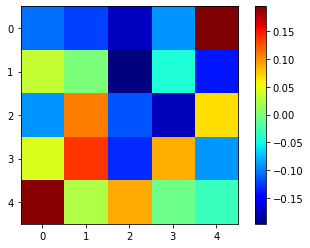

In [13]:
import matplotlib.pyplot as plt

plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [14]:
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(1.0,))
])

trainset = datasets.MNIST(root='./datasets', train=True, download=True, transform=mnist_transform)

testset = datasets.MNIST(root='./datasets', train=False, download=True, transform=mnist_transform)

train_loader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([28, 28])


In [16]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

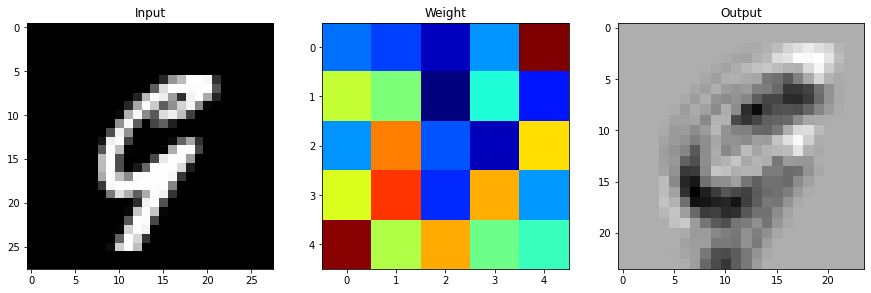

In [18]:
plt.figure(figsize=(15, 30))

plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

### Pooling layers
- `F.max_pool2d`
    - stride

    - kernel_size
    
- `torch.nn.MaxPool2d`도 많이 사용함

In [19]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()` 변환이 가능함

In [20]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

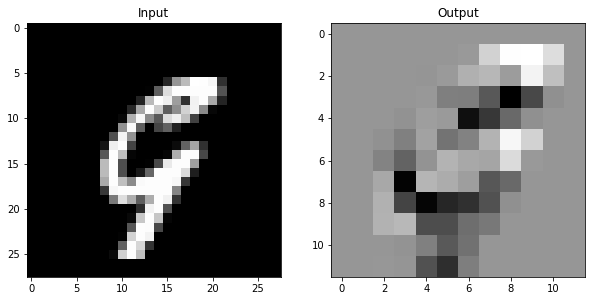

In [21]:
plt.figure(figsize=(10, 15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

### Linear layers
1d만 가능하므로 `.view()`를 통해 1d로 flatten 해주어야함

In [22]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [23]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [24]:
lin

tensor([[ 0.2665,  0.2044, -0.3059, -0.1438, -0.6675,  0.2963, -0.0472,  0.1718,
         -0.2912, -0.0727]], grad_fn=<AddmmBackward>)

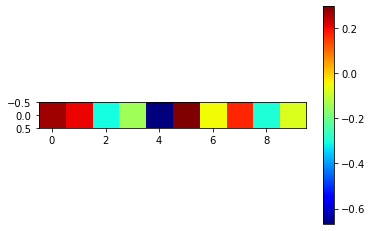

In [25]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Non-linear activations
`F.softmax`와 같은 활성화 함수들

In [26]:
with torch.no_grad():
    flatten = input_image.view(1, 28 * 28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.1014, 0.1054, 0.0835, 0.1301, 0.0931, 0.0977, 0.0959, 0.1017, 0.0943,
         0.0971]])

In [28]:
import numpy as np

np.sum(softmax.numpy())

1.0

`F.relu`
- `ReLU` 함수를 적용하는 layer
- `nn.ReLU`로도 사용 가능

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
inputs = torch.randn(4, 3, 28, 28).to(device=device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [32]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))

output.shape

torch.Size([4, 20, 24, 24])